In [1]:
import pandas as pd
import os
import numpy as np

In [186]:
convertTable = dict()
convertTable['Zip Code'] = str
df = pd.read_csv ('Telco_customer_churn.csv', dtype = convertTable)
df['Total Charges'] = pd.to_numeric(df['Total Charges'] , errors='coerce')
df[df['Total Charges'].isnull()==True]
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [187]:
# Calculate the percentage of missing values 
missing_values = df.isnull().sum()
missing_values_percentage = 100 * missing_values / len(df)
missing_values_table = pd.concat([missing_values, missing_values_percentage], axis=1)
missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values', 1 : '% of Missing Values'})
missing_values_table = missing_values_table[missing_values_table.iloc[:,0] != 0].sort_values('% of Missing Values', ascending=False).round(1)
missing_values_table

,Missing Values,% of Missing Values
Churn Reason,5174,73.5
Total Charges,11,0.2


In [188]:
df = df.drop(['Churn Reason'], axis=1)
df.dropna(how = 'any', inplace = True)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   object 
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 

In [190]:
# สร้าง df สำหรับ Neural Network
df_nn = df[['Gender','Senior Citizen','Partner','Dependents','Tenure Months','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Monthly Charges','Total Charges','Churn Value','Churn Score','CLTV']]
df_nn.head()


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340


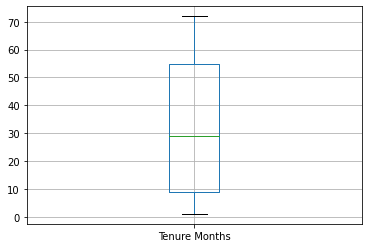

In [28]:
boxplot = df.boxplot(column=['Tenure Months'])  

In [29]:
import plotly.express as px
fig = px.histogram(df, x="Tenure Months")
fig.show()

In [30]:

print('Gender')
print(set(df['Gender']))

print('Senior Citizen')
print(set(df['Senior Citizen']))

print('Partner')
print(set(df['Partner']))

print('Dependents')
print(set(df['Dependents']))

print('Phone Service')
print(set(df['Phone Service']))

print('Multiple Lines')
print(set(df['Multiple Lines']))

print('Internet Service')
print(set(df['Internet Service']))

print('Online Security')
print(set(df['Online Security']))

print('Online Backup')
print(set(df['Online Backup']))

print('Device Protection')
print(set(df['Device Protection']))

print('Tech Support')
print(set(df['Tech Support']))

print('Streaming TV')
print(set(df['Streaming TV']))

print('Streaming Movies')
print(set(df['Streaming Movies']))

print('Contract')
print(set(df['Contract']))

print('Paperless Billing')
print(set(df['Paperless Billing']))

print('Payment Method')
print(set(df['Payment Method']))



Gender
{'Male', 'Female'}
Senior Citizen
{'No', 'Yes'}
Partner
{'No', 'Yes'}
Dependents
{'No', 'Yes'}
Phone Service
{'No', 'Yes'}
Multiple Lines
{'No', 'No phone service', 'Yes'}
Internet Service
{'DSL', 'No', 'Fiber optic'}
Online Security
{'No', 'No internet service', 'Yes'}
Online Backup
{'No', 'No internet service', 'Yes'}
Device Protection
{'No', 'No internet service', 'Yes'}
Tech Support
{'No', 'No internet service', 'Yes'}
Streaming TV
{'No', 'No internet service', 'Yes'}
Streaming Movies
{'No', 'No internet service', 'Yes'}
Contract
{'Two year', 'One year', 'Month-to-month'}
Paperless Billing
{'No', 'Yes'}
Payment Method
{'Mailed check', 'Credit card (automatic)', 'Electronic check', 'Bank transfer (automatic)'}


In [31]:
set(df['Senior Citizen'])

{'No', 'Yes'}

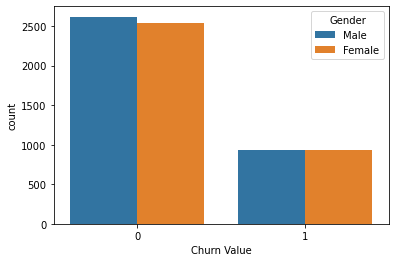

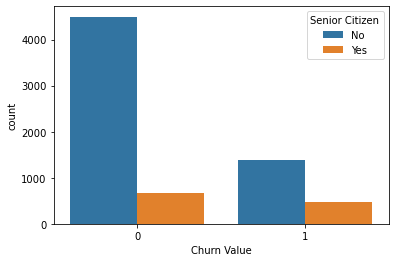

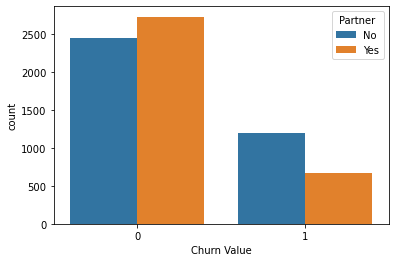

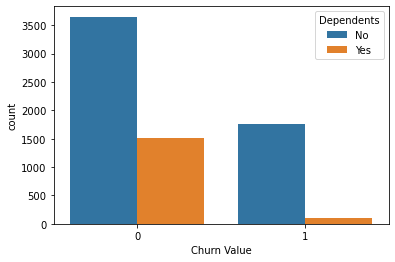

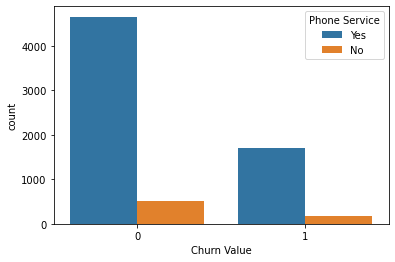

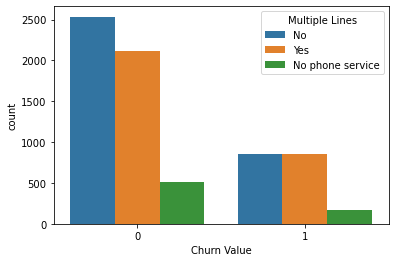

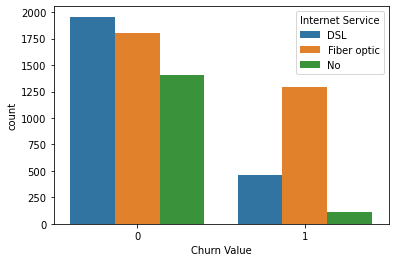

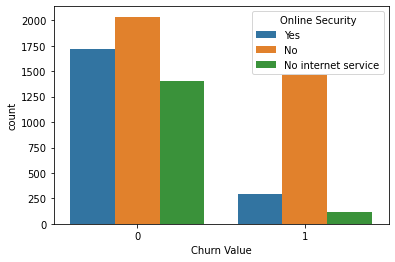

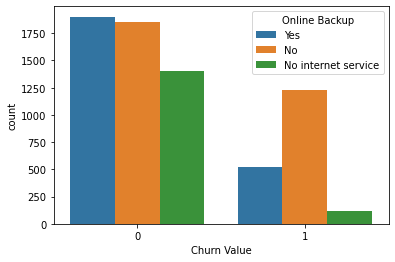

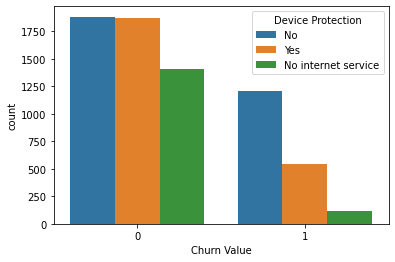

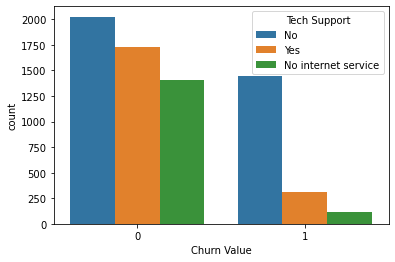

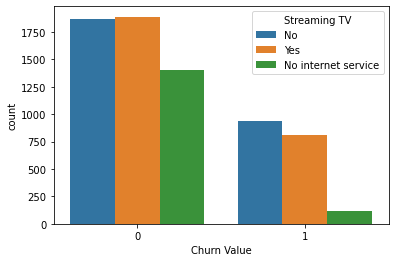

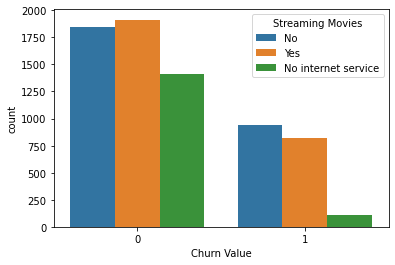

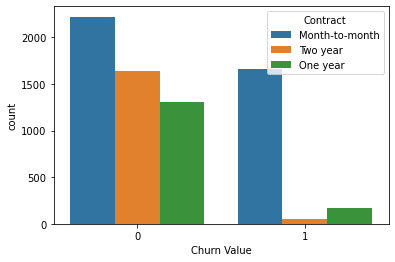

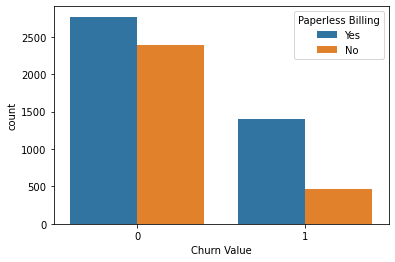

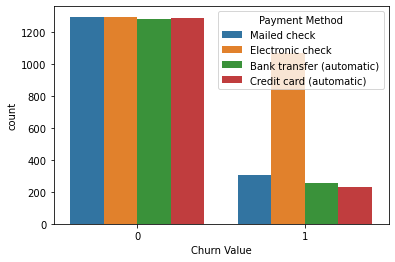

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
listcol = ['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
for i in listcol:
    plt.figure(i)
    sns.countplot(x='Churn Value', hue =i,  data=df)

In [39]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="Latitude", 
                        lon="Longitude",
                        color="Churn Label",
                        color_discrete_map={"Yes": "rgb(254,57,57)", "No": "rgb(65,105,225)"},
                        hover_name="City", 
                        hover_data=["CustomerID"],
                        zoom=3, 
                        height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [11]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340


In [12]:
df2 = df.groupby(['Gender', 'Churn Label']).agg({'Churn Label': 'count'})
df2 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df2

Churn Label
Gender Churn Label             
Female No             73.040482
       Yes            26.959518
Male   No             73.795435
       Yes            26.204565

In [13]:
df3 = df.groupby(['Senior Citizen', 'Churn Label']).agg({'Churn Label': 'count'})
df3 = df3.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df3

Churn Label
Senior Citizen Churn Label             
No             No             76.349745
               Yes            23.650255
Yes            No             58.318739
               Yes            41.681261

In [14]:
# pd.crosstab(df['Churn Label'],df['Gender']).apply(lambda r: r/r.sum(), axis=1)

In [15]:
import plotly.graph_objects as go
import numpy as np

labels = ["Female","Male","Age < 65","Age >= 65"]
widths = np.array([25,25,25,25])

data = {
    "No": [73.079128,73.839662,76.393832,58.318739],
    "Yes": [26.920872,26.160338,23.606168,41.681261]
}

fig = go.Figure()
for key in data:
    fig.add_trace(go.Bar(
        name=key,
        y=data[key],
        x=np.cumsum(widths)-widths,
        width=widths,
        offset=0,
        customdata=np.transpose([labels, widths*data[key]]),
        texttemplate="%{y} x %{width} =<br>%{customdata[1]}",
        textposition="inside",
        textangle=0,
        textfont_color="white",
        hovertemplate="<br>".join([
            "label: %{customdata[0]}",
            "width: %{width}",
            "height: %{y}",
            "area: %{customdata[1]}",
        ])
    ))

fig.update_xaxes(
    tickvals=np.cumsum(widths)-widths/2,
    ticktext= ["%s<br>%d" % (l, w) for l, w in zip(labels, widths)]
)

fig.update_xaxes(range=[0,100])
fig.update_yaxes(range=[0,100])

fig.update_layout(
    title_text="Marimekko Chart",
    barmode="stack",
    uniformtext=dict(mode="hide", minsize=10),
)

In [16]:
df = df[['Gender','Senior Citizen','Partner','Dependents','Tenure Months','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Monthly Charges','Total Charges','Churn Value','Churn Label','Churn Score','CLTV']]
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Label,Churn Score,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Yes,86,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Yes,67,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,Yes,86,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,Yes,84,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,Yes,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,No,45,5306
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,0,No,59,2140
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,No,71,5560
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,No,59,2793


In [17]:
df['Tenure Months']

0        2
1        2
2        8
3       28
4       49
        ..
7038    72
7039    24
7040    72
7041    11
7042    66
Name: Tenure Months, Length: 7032, dtype: int64

In [18]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df1 = df.copy()
df1['tenure_year'] = pd.cut(df1['Tenure Months'], range(1, 80, 12), right=False, labels=labels)
df1['tenure_year'] = df1['tenure_year'].replace({'1 - 12': 'firstyear','13 - 24': 'secondyear',
                             '25 - 36': 'thirdyear','37 - 48': 'fourthyear',
                             '49 - 60': 'fifthyear','61 - 72': 'sixthyear'})


df1

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Label,Churn Score,CLTV,tenure_year
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,1,Yes,86,3239,firstyear
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,1,Yes,67,2701,firstyear
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,99.65,820.50,1,Yes,86,5372,firstyear
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,1,Yes,84,5003,thirdyear
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,Yes,89,5340,fifthyear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,No,45,5306,sixthyear
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,One year,Yes,Mailed check,84.80,1990.50,0,No,59,2140,secondyear
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,One year,Yes,Credit card (automatic),103.20,7362.90,0,No,71,5560,sixthyear
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Month-to-month,Yes,Electronic check,29.60,346.45,0,No,59,2793,firstyear


In [57]:
# Split Violin Plot
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Violin(x=df1['tenure_year'][ df1['Churn Label'] == 'Yes' ],
                        y=df1['Monthly Charges'][ df1['Churn Label'] == 'Yes' ],
                        legendgroup='Yes', scalegroup='Yes', name='Yes',
                        side='positive',
                        line_color='red')
             )
fig.add_trace(go.Violin(x=df1['tenure_year'][ df1['Churn Label'] == 'No' ],
                        y=df1['Monthly Charges'][ df1['Churn Label'] == 'No' ],
                        legendgroup='No', scalegroup='No', name='No',
                        side='negative',
                        line_color='blue')
             )
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0.35, violinmode='overlay')
fig.update_layout(autosize=False,width=1000,height=600,)
fig.show()

In [61]:
# Split Violin Plot
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Violin(x=df1['Contract'][ df1['Churn Label'] == 'Yes' ],
                        y=df1['Monthly Charges'][ df1['Churn Label'] == 'Yes' ],
                        legendgroup='Yes', scalegroup='Yes', name='Yes',
                        side='positive',
                        line_color='red')
             )
fig.add_trace(go.Violin(x=df1['Contract'][ df1['Churn Label'] == 'No' ],
                        y=df1['Monthly Charges'][ df1['Churn Label'] == 'No' ],
                        legendgroup='No', scalegroup='No', name='No',
                        side='negative',
                        line_color='blue')
             )
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0.35, violinmode='overlay')
fig.update_layout(autosize=False,width=1000,height=600,)
fig.show()

In [87]:
df5 = df1.groupby(['Senior Citizen', 'Churn Label']).agg({'Churn Label': 'count'})
df5.columns = ['customers']
df5 = df5.reset_index()
df5

,Senior Citizen,Churn Label,customers
0,No,No,4497
1,No,Yes,1393
2,Yes,No,666
3,Yes,Yes,476


In [88]:
import plotly.express as px
fig = px.histogram(df5, x="Senior Citizen", y="customers",
             color='Churn Label', barmode='group',
             height=400)
fig.show()

# Logistic Regression
https://www.kaggle.com/code/nehapawar/churn-prediction-using-logistic-regression/notebook

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
    
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [224]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Label,Churn Score,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Yes,86,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Yes,67,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,Yes,86,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,Yes,84,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,Yes,89,5340


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7032 non-null   object 
 1   Senior Citizen     7032 non-null   object 
 2   Partner            7032 non-null   object 
 3   Dependents         7032 non-null   object 
 4   Tenure Months      7032 non-null   int64  
 5   Phone Service      7032 non-null   object 
 6   Multiple Lines     7032 non-null   object 
 7   Internet Service   7032 non-null   object 
 8   Online Security    7032 non-null   object 
 9   Online Backup      7032 non-null   object 
 10  Device Protection  7032 non-null   object 
 11  Tech Support       7032 non-null   object 
 12  Streaming TV       7032 non-null   object 
 13  Streaming Movies   7032 non-null   object 
 14  Contract           7032 non-null   object 
 15  Paperless Billing  7032 non-null   object 
 16  Payment Method     7032 

In [230]:
df = df.drop(columns=['Churn Label'])
dummy_df = pd.get_dummies(df)
dummy_df

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,1,86,3239,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
1,2,70.70,151.65,1,67,2701,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,8,99.65,820.50,1,86,5372,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
3,28,104.80,3046.05,1,84,5003,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,49,103.70,5036.30,1,89,5340,0,1,1,0,...,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.40,0,45,5306,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
7039,24,84.80,1990.50,0,59,2140,0,1,1,0,...,1,0,1,0,0,1,0,0,0,1
7040,72,103.20,7362.90,0,71,5560,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7041,11,29.60,346.45,0,59,2793,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [227]:
dummy_df.columns

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV', 'Gender_Female', 'Gender_Male',
       'Senior Citizen_No', 'Senior Citizen_Yes', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'Phone Service_No',
       'Phone Service_Yes', 'Multiple Lines_No',
       'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No',
       'Streaming TV_No internet service', 'Streaming TV_Yes',
       'Streaming Movies_No', 'Streaming Movies_No internet servi

In [231]:
y = dummy_df['Churn Value']
X = dummy_df.drop('Churn Value', axis=1)

In [112]:
# Feature Scaling use Min-Max Scaling [0,1]
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))

In [113]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)

In [114]:
#Build model
from sklearn.linear_model import LogisticRegression
# Instantiate a logistic regression model without an intercept, arbitrarily large C value will offset the lack of intercept
logreg = LogisticRegression(fit_intercept = False, C = 1e6, solver = 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000.0, fit_intercept=False, solver='liblinear')

In [115]:
# predict future values
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [116]:
# Evaluating Model Performance
#for train set

resiudals = np.abs(y_train, y_hat_train)
 
#the number of times our model was correct ('0') and incorrect ('1')
print(pd.Series(resiudals).value_counts())

#normalized
print(pd.Series(resiudals).value_counts(normalize = True))

0    3590
1    1332
Name: Churn Value, dtype: int64
0    0.729378
1    0.270622
Name: Churn Value, dtype: float64


In [117]:
# Evaluating Model Performance
#for test set

resiudals = np.abs(y_test, y_hat_test)
 
#the number of times our model was correct ('0') and incorrect ('1')
print(pd.Series(resiudals).value_counts())

#normalized
print(pd.Series(resiudals).value_counts(normalize = True))

0    1573
1     537
Name: Churn Value, dtype: int64
0    0.745498
1    0.254502
Name: Churn Value, dtype: float64


In [118]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test)
cnf_matrix

array([[1573,    0],
       [   0,  537]], dtype=int64)

In [153]:
#  !pip install scipy  
# !pip uninstall sklearn
# !pip uninstall scikit-learn
# !pip install sklearn
# !pip install scikit-learn
# !pip install -U scikit-learn

In [156]:
# F1 Score

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
precision_train = precision_score(y_train, y_hat_train)
precision_test = precision_score(y_test, y_hat_test)
recall_train = recall_score(y_train, y_hat_train)
recall_test = recall_score(y_test, y_hat_test)
accuracy_train = accuracy_score(y_train, y_hat_train)
accuracy_test = accuracy_score(y_test, y_hat_test)
f1_train = f1_score(y_train, y_hat_train)
f1_test = f1_score(y_test, y_hat_test)

print('precision_train')
print(precision_train)
print('precision_test')
print(precision_test)
print('--------------')
print('recall_train')
print(recall_train)
print('recall_test')
print(recall_test)
print('--------------')
print('accuracy_train')
print(accuracy_train)
print('accuracy_test')
print(accuracy_test)
print('--------------')
print('f1_train')
print(f1_train)
print('f1_test')
print(f1_test)

precision_train
1.0
precision_test
1.0
--------------
recall_train
1.0
recall_test
1.0
--------------
accuracy_train
1.0
accuracy_test
1.0
--------------
f1_train
1.0
f1_test
1.0


In [124]:
pd.set_option('display.max_columns', None)
df_nn.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340


# Neural Network

https://www.analyticsvidhya.com/blog/2021/10/customer-churn-prediction-using-artificial-neural-network/

In [191]:
# Group the tenure in bins of 12 months
# labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

# df_nn['tenure_year'] = pd.cut(df_nn['Tenure Months'], range(1, 80, 12), right=False, labels=labels)
# df_nn['tenure_year'].value_counts()

In [192]:
# df_nn = df_nn.drop(columns=['Tenure Months'])
# df_nn

In [193]:
df_nn = df_nn.drop(columns=['CLTV','Churn Score'])
df_nn


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


In [194]:
# df_model.to_csv('churn_telecom_IBM.csv',index=False)

In [195]:
# df_dummies = pd.get_dummies(df_model)

In [196]:
# df_dummies.drop(columns=['Gender_Female'])

In [197]:
#numerical variables

num = list(df_nn.select_dtypes(include=['int64','float64']).keys())

#categorical variables

cat = list(df_nn.select_dtypes(include='O').keys())

print(cat)

print(num)

['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value']


In [198]:

print('Gender')
print(set(df_nn['Gender']))

print('Senior Citizen')
print(set(df_nn['Senior Citizen']))

print('Partner')
print(set(df_nn['Partner']))

print('Dependents')
print(set(df_nn['Dependents']))

print('Phone Service')
print(set(df_nn['Phone Service']))

print('Multiple Lines')
print(set(df_nn['Multiple Lines']))

print('Internet Service')
print(set(df_nn['Internet Service']))

print('Online Security')
print(set(df_nn['Online Security']))

print('Online Backup')
print(set(df_nn['Online Backup']))

print('Device Protection')
print(set(df_nn['Device Protection']))

print('Tech Support')
print(set(df_nn['Tech Support']))

print('Streaming TV')
print(set(df_nn['Streaming TV']))

print('Streaming Movies')
print(set(df_nn['Streaming Movies']))

print('Contract')
print(set(df_nn['Contract']))

print('Paperless Billing')
print(set(df_nn['Paperless Billing']))

print('Payment Method')
print(set(df_nn['Payment Method']))



Gender
{'Male', 'Female'}
Senior Citizen
{'No', 'Yes'}
Partner
{'No', 'Yes'}
Dependents
{'No', 'Yes'}
Phone Service
{'No', 'Yes'}
Multiple Lines
{'No', 'No phone service', 'Yes'}
Internet Service
{'DSL', 'No', 'Fiber optic'}
Online Security
{'No', 'No internet service', 'Yes'}
Online Backup
{'No', 'No internet service', 'Yes'}
Device Protection
{'No', 'No internet service', 'Yes'}
Tech Support
{'No', 'No internet service', 'Yes'}
Streaming TV
{'No', 'No internet service', 'Yes'}
Streaming Movies
{'No', 'No internet service', 'Yes'}
Contract
{'Two year', 'One year', 'Month-to-month'}
Paperless Billing
{'No', 'Yes'}
Payment Method
{'Mailed check', 'Credit card (automatic)', 'Electronic check', 'Bank transfer (automatic)'}


In [199]:
# value_counts of the categorical columns
# for i in cat:
#     print(df[i].value_counts())
# as we see that there is extra categories which we have to convert it into No.
df_nn['Multiple Lines'] = df_nn['Multiple Lines'].replace('No phone service','No')
df_nn['Online Security'] = df_nn['Online Security'].replace('No internet service','No')
df_nn['Online Backup'] = df_nn['Online Backup'] .replace('No internet service','No')
df_nn['Device Protection'] = df_nn['Device Protection'].replace('No internet service','No')
df_nn['Tech Support'] = df_nn['Tech Support'].replace('No internet service','No')
df_nn['Streaming TV'] = df_nn['Streaming TV'].replace('No internet service','No')
df_nn['Streaming Movies'] = df_nn['Streaming Movies'].replace('No internet service','No')
df_nn

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7041,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


In [200]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_nn['Internet Service'] = label.fit_transform(df_nn['Internet Service'])
df_nn['Contract'] = label.fit_transform(df_nn['Contract'])
df_nn['Payment Method'] = label.fit_transform(df_nn['Payment Method'])

In [201]:
df_nn

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,0,Yes,Yes,No,No,No,No,0,Yes,3,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,1,No,No,No,No,No,No,0,Yes,2,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,1,No,No,Yes,No,Yes,Yes,0,Yes,2,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,1,No,No,Yes,Yes,Yes,Yes,0,Yes,2,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,1,No,Yes,Yes,No,Yes,Yes,0,Yes,0,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,2,No,No,No,No,No,No,2,Yes,0,21.15,1419.40,0
7039,Male,No,Yes,Yes,24,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,1,Yes,3,84.80,1990.50,0
7040,Female,No,Yes,Yes,72,Yes,Yes,1,No,Yes,Yes,No,Yes,Yes,1,Yes,1,103.20,7362.90,0
7041,Female,No,Yes,Yes,11,No,No,0,Yes,No,No,No,No,No,0,Yes,2,29.60,346.45,0


In [202]:
# we will convert male = 1 and female = 0
df_nn.Gender = df_nn.Gender.replace('Male',1)
df_nn.Gender = df_nn.Gender.replace('Female',0)

In [203]:
df_nn

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,1,No,No,No,2,Yes,No,0,Yes,Yes,No,No,No,No,0,Yes,3,53.85,108.15,1
1,0,No,No,Yes,2,Yes,No,1,No,No,No,No,No,No,0,Yes,2,70.70,151.65,1
2,0,No,No,Yes,8,Yes,Yes,1,No,No,Yes,No,Yes,Yes,0,Yes,2,99.65,820.50,1
3,0,No,Yes,Yes,28,Yes,Yes,1,No,No,Yes,Yes,Yes,Yes,0,Yes,2,104.80,3046.05,1
4,1,No,No,Yes,49,Yes,Yes,1,No,Yes,Yes,No,Yes,Yes,0,Yes,0,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,No,No,No,72,Yes,No,2,No,No,No,No,No,No,2,Yes,0,21.15,1419.40,0
7039,1,No,Yes,Yes,24,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,1,Yes,3,84.80,1990.50,0
7040,0,No,Yes,Yes,72,Yes,Yes,1,No,Yes,Yes,No,Yes,Yes,1,Yes,1,103.20,7362.90,0
7041,0,No,Yes,Yes,11,No,No,0,Yes,No,No,No,No,No,0,Yes,2,29.60,346.45,0


In [204]:
for i in cat:
    df_nn[i] = df_nn[i].replace('Yes',1)
    df_nn[i] = df_nn[i].replace('No',0)
    

In [205]:
df_nn

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
1,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
2,0,0,0,1,8,1,1,1,0,0,1,0,1,1,0,1,2,99.65,820.50,1
3,0,0,1,1,28,1,1,1,0,0,1,1,1,1,0,1,2,104.80,3046.05,1
4,1,0,0,1,49,1,1,1,0,1,1,0,1,1,0,1,0,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,0,2,0,0,0,0,0,0,2,1,0,21.15,1419.40,0
7039,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7040,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7041,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0


In [206]:
scale_cols = ['Tenure Months','Monthly Charges','Total Charges']
# now we scling all the data 
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df_nn[scale_cols] = scale.fit_transform(df_nn[scale_cols])

In [207]:
# independent and dependent variables
x = df_nn.drop('Churn Value',axis=1)
y = df_nn['Churn Value']

In [209]:
# Splitting data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10)
print(xtrain.shape)
print(xtest.shape)

(4922, 19)
(2110, 19)


In [210]:
# Build Neural Network
import tensorflow as tf
from tensorflow import keras

In [211]:
model = keras.Sequential([
    # input layer
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [212]:
# time for compilation of neural net.
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
154/154 [==============================] - 0s 523us/step - loss: 0.5419 - accuracy: 0.7355
Epoch 2/100
154/154 [==============================] - 0s 530us/step - loss: 0.4254 - accuracy: 0.7972
Epoch 3/100
154/154 [==============================] - 0s 523us/step - loss: 0.4080 - accuracy: 0.8104
Epoch 4/100
154/154 [==============================] - 0s 523us/step - loss: 0.4039 - accuracy: 0.8108
Epoch 5/100
154/154 [==============================] - 0s 523us/step - loss: 0.4020 - accuracy: 0.8111
Epoch 6/100
154/154 [==============================] - 0s 535us/step - loss: 0.3983 - accuracy: 0.8135
Epoch 7/100
154/154 [==============================] - 0s 530us/step - loss: 0.3968 - accuracy: 0.8113
Epoch 8/100
154/154 [==============================] - 0s 536us/step - loss: 0.3969 - accuracy: 0.8141
Epoch 9/100
154/154 [==============================] - 0s 545us/step - loss: 0.3953 - accuracy: 0.8125
Epoch 10/100
154/154 [==============================] - 0s 523us/step - l

In [213]:
# evalute the model
model.evaluate(xtest,ytest)

66/66 [==============================] - 0s 400us/step - loss: 0.4406 - accuracy: 0.7934


[0.44060009717941284, 0.793364942073822]

In [214]:
# predict the churn values
ypred = model.predict(xtest)
print(ypred)
# unscaling the ypred values 
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

[[0.59045047]
 [0.25804576]
 [0.41072264]
 ...
 [0.18636867]
 [0.00091717]
 [0.7135642 ]]
[1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 

In [215]:
#make dataframe for comparing the orignal and predict values
data = {'orignal_churn':ytest, 'predicted_churn':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
5400,0,1
1676,1,0
2071,0,0
3358,0,0
6629,0,0
149,1,1
1725,1,0
5971,0,0
3050,0,0
1179,1,1


In [217]:
# checking for performance metrices
#importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report
#print classification_report
print(classification_report(ytest,ypred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=ytest,predictions=ypred_lis)
# plt.figure(figsize = (17,7))
# sb.heatmap(conf_mat, annot=True,fmt='d')
# plt.xlabel('Predicted_number')
# plt.ylabel('True_number')

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1534
           1       0.64      0.54      0.59       576

    accuracy                           0.79      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.79      0.79      2110

